In [1]:
# ===============================
# Cell 1: Import Libraries
# ===============================

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# ===============================
# Cell 2: Load MNIST Dataset
# ===============================

X, y = fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True,
    as_frame=False
)

print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)

Dataset shape: (70000, 784)
Labels shape: (70000,)


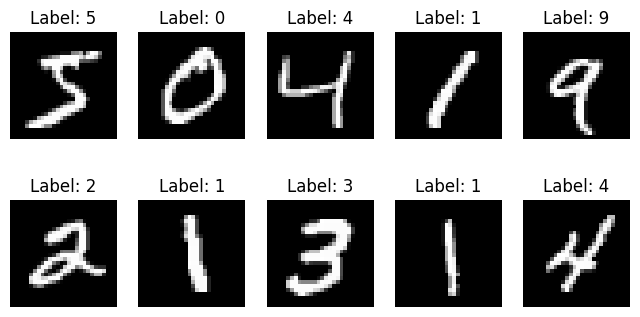

In [3]:
# ===============================
# Cell 3: Visualize Sample Images
# ===============================

plt.figure(figsize=(8,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()

In [4]:
# ===============================
# Cell 4: Feature Scaling
# ===============================

print("Before scaling:")
print("Max pixel value:", X.max())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nAfter scaling:")
print("Max value:", X_scaled.max())

Before scaling:
Max pixel value: 255

After scaling:
Max value: 264.5732412773447


In [5]:
# ===============================
# Cell 5: Train-Test Split
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (56000, 784)
Testing samples: (14000, 784)


In [6]:
# ===============================
# Cell 6: Train Model
# ===============================

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs'
)

model.fit(X_train, y_train)

print("Logistic Regression model trained successfully")

Logistic Regression model trained successfully


In [7]:
# ===============================
# Cell 7: Predictions
# ===============================

y_pred = model.predict(X_test)

print("First 20 predictions:")
print(y_pred[:20])

First 20 predictions:
['7' '3' '1' '1' '2' '5' '9' '3' '8' '1' '6' '6' '3' '6' '8' '8' '4' '4'
 '7' '6']


In [8]:
# ===============================
# Cell 8: Evaluation Metrics
# ===============================

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9164285714285715

Confusion Matrix:
 [[1333    0    5    2    6   11    9    2   12    1]
 [   1 1519    7   11    1    8    2   10   14    2]
 [  13   20 1242   21   13   12   24   20   26    7]
 [  10    7   30 1270    3   53    3   17   24   11]
 [   2    7   14    4 1244    1   18    9   11   55]
 [  12    4   10   46    7 1103   24    7   38   12]
 [  13    5   12    0   12   17 1309    0    7    0]
 [   5    8   15    9   12    2    0 1368    4   36]
 [  11   24   11   38    6   43    9    4 1200   19]
 [   8   12    3   22   37   12    1   46    8 1242]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1381
           1       0.95      0.96      0.96      1575
           2       0.92      0.89      0.90      1398
           3       0.89      0.89      0.89      1428
           4       0.93      0.91      0.92      1365
           5       0.87      0.87      0.87      1263
           6    

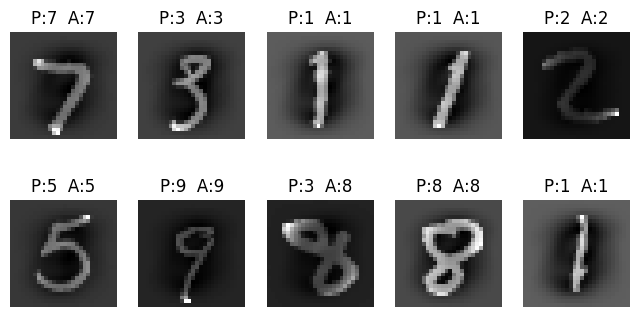

In [9]:
# ===============================
# Cell 9: Predicted vs Actual Images
# ===============================

plt.figure(figsize=(8,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"P:{y_pred[i]}  A:{y_test[i]}")
    plt.axis('off')

plt.show()